In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df=df.drop_duplicates()

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


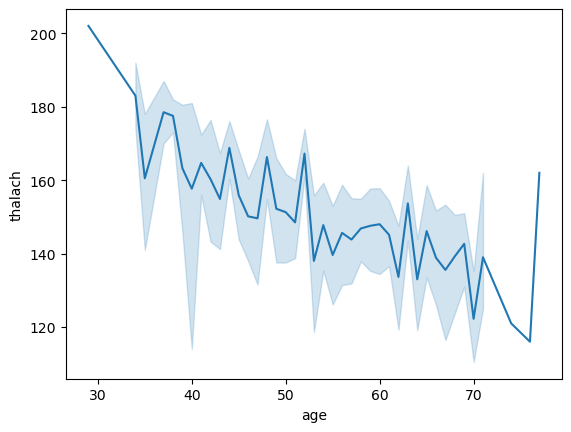

In [9]:
sns.lineplot(x='age', y='thalach', data =df)
plt.show()

<Axes: >

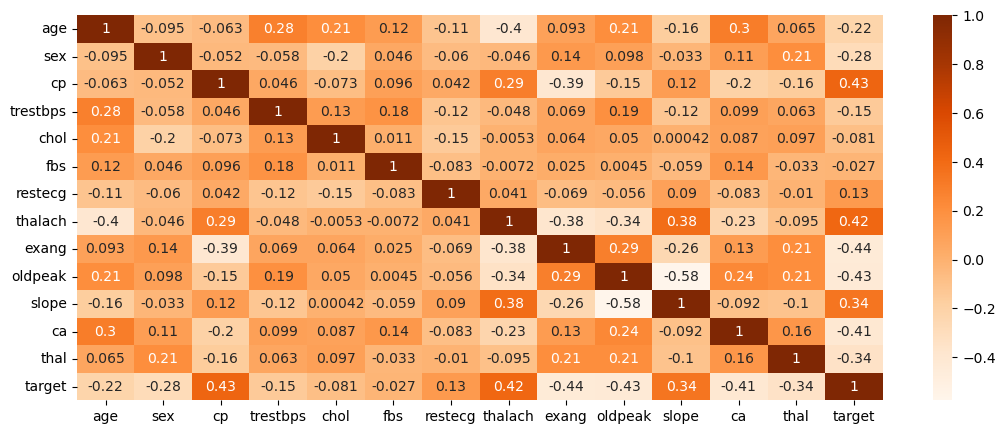

In [10]:
plt.figure(figsize=(13,5))
sns.heatmap(df.corr(),cmap="Oranges", annot=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x= df.iloc[:,:-1]
y=df["target"]

In [13]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2)

In [14]:
y_train

281    0
226    0
109    1
64     1
14     1
      ..
75     1
22     1
72     1
15     1
169    0
Name: target, Length: 211, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=dt_model.predict(x_test)

In [18]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [19]:
y_test

99     1
296    0
89     1
30     1
297    0
      ..
20     1
28     1
131    1
173    0
71     1
Name: target, Length: 91, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
accuracy_score(y_test,y_pred)

0.7802197802197802

In [22]:
confusion_matrix(y_test,y_pred)

array([[29, 13],
       [ 7, 42]], dtype=int64)

<Axes: >

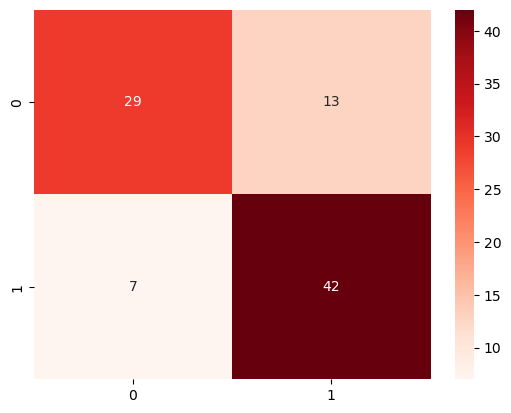

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Reds',annot=True)

In [24]:
l=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [25]:
for i in l:
    model=DecisionTreeClassifier(random_state=1,max_depth=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("at max depth" , i, ",", "the accuracy is", acc)
    

at max depth 1 , the accuracy is 0.7582417582417582
at max depth 2 , the accuracy is 0.7802197802197802
at max depth 3 , the accuracy is 0.8351648351648352
at max depth 4 , the accuracy is 0.8351648351648352
at max depth 5 , the accuracy is 0.8131868131868132
at max depth 6 , the accuracy is 0.8131868131868132
at max depth 7 , the accuracy is 0.8461538461538461
at max depth 8 , the accuracy is 0.8571428571428571
at max depth 9 , the accuracy is 0.8571428571428571
at max depth 10 , the accuracy is 0.8571428571428571
at max depth 11 , the accuracy is 0.8571428571428571
at max depth 12 , the accuracy is 0.8571428571428571
at max depth 13 , the accuracy is 0.8571428571428571
at max depth 14 , the accuracy is 0.8571428571428571
at max depth 15 , the accuracy is 0.8571428571428571


In [26]:
f_model=DecisionTreeClassifier(random_state=1,max_depth=8)
f_model.fit(x_train,y_train)
y_pred=f_model.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
print("at max depth" , 8, ",", "the accuracy is", acc)
    

at max depth 8 , the accuracy is 85.71428571428571


In [27]:
from sklearn import tree

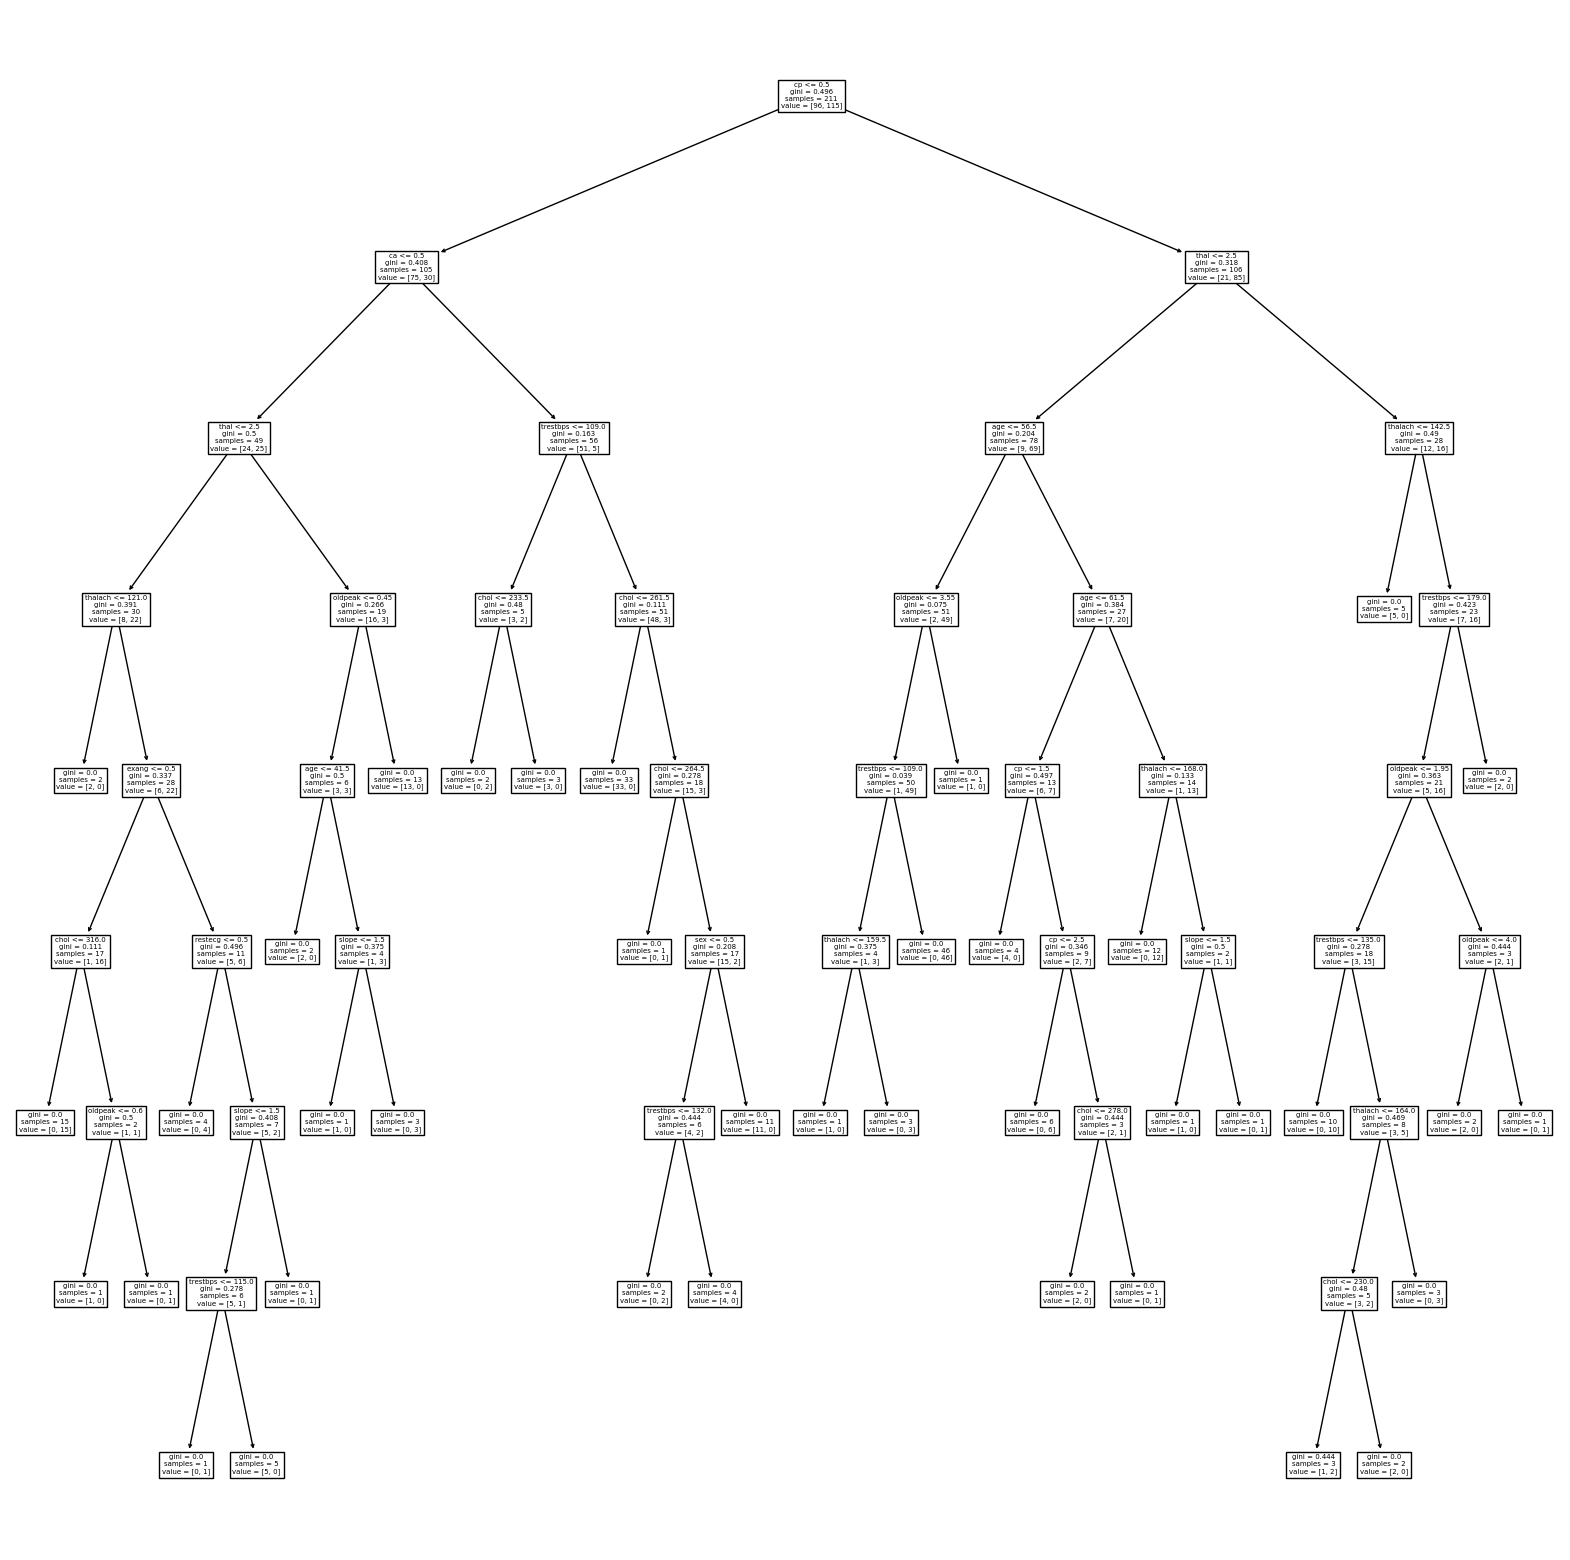

In [28]:
plt.figure(figsize=(20,20))
tree.plot_tree(f_model,feature_names=x.columns.tolist())
plt.show()
